#### 무게를 찾기 
- 목표 : 농어 (Perch) 길이 피쳐를 사용해서 무게를 예측하기
- 데이터셋 : fish.csv
- 피쳐 / 속성 : Length
- 타겟 / 라벨 : Weight
- 학습-방법 : 지도학습 > 회귀
- 알고리즘 : 선형회귀 >>> 데이터 분포가 선형의 형태

[1] 데이터 준비 및 피쳐 / 타겟 분석

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [118]:
DATA_FILE='../data/fish.csv'

In [119]:
fishDF=pd.read_csv(DATA_FILE, usecols=[0,1,2])
fishDF.head(3)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5


In [120]:
mask=(fishDF['Species']=='Perch' )
oneDF=fishDF[mask]
oneDF.reset_index(drop=True, inplace=True)
oneDF.index

RangeIndex(start=0, stop=56, step=1)

In [121]:
oneDF.drop(columns='Species', inplace=True)

C:\Users\KDP-27\AppData\Local\Temp\ipykernel_9760\739637677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oneDF.drop(columns='Species', inplace=True)


[1-1] 피쳐 분석 ==> 상관계수값, 시각화 2가지 모두 고려

In [122]:
oneDF.corr()

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


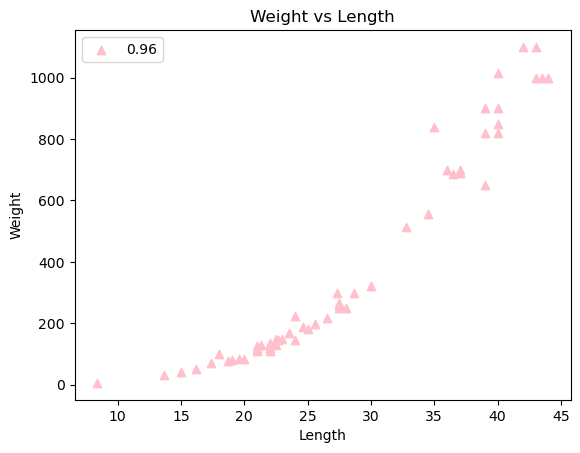

In [123]:
plt.scatter(oneDF['Length'], oneDF['Weight'], label=round(oneDF.corr()['Weight'][1],2), marker='^', c='pink')
plt.xlabel("Length")
plt.ylabel("Weight")
plt.title('Weight vs Length')
plt.legend()
plt.show()

길이로 무게를 예측하는 회귀 예측을 할 거다

In [124]:
featureDF=oneDF[['Length']]
targetSR=oneDF['Weight']
X_train, X_test, y_train, y_test=train_test_split(featureDF, targetSR)

In [125]:
mmScaler = StandardScaler()
mmScaler.fit(X_train)
X_train_scaled=mmScaler.transform(X_train)
X_test_scaled=mmScaler.transform(X_test)

In [126]:
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [127]:
model=LinearRegression()

In [128]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [129]:
print(model.score(X_train_scaled, y_train),
model.score(X_test_scaled, y_test))

0.9201486595884488 0.8332112625890852


In [130]:
pd.DataFrame([model.predict(X_test_scaled).tolist(),y_test]).T

,0,1
0,92.640229,85.0
1,181.035923,120.0
2,291.530541,180.0
3,181.035923,120.0
4,641.430164,556.0
5,376.243081,300.0
6,276.797925,188.0
7,733.509013,700.0
8,578.816548,514.0
9,427.807236,300.0


In [131]:
print(f'{pd.Series(model.predict(X_test_scaled))},{y_test}')

0      92.640229
1     181.035923
2     291.530541
3     181.035923
4     641.430164
5     376.243081
6     276.797925
7     733.509013
8     578.816548
9     427.807236
10    346.777850
11    144.204384
12    254.699002
13     59.491843
dtype: float64,0      85.0
1     120.0
2     180.0
3     120.0
4     556.0
5     300.0
6     188.0
7     700.0
8     514.0
9     300.0
10    218.0
11    115.0
12    225.0
13     78.0
Name: Weight, dtype: float64


In [132]:
model.coef_*X_test_scaled+model.intercept_

array([[ 92.64022864],
       [181.035923  ],
       [291.53054094],
       [181.035923  ],
       [641.43016444],
       [376.24308137],
       [276.79792522],
       [733.50901272],
       [578.8165476 ],
       [427.80723641],
       [346.77784991],
       [144.20438368],
       [254.69900163],
       [ 59.49184326]])

In [133]:
x=sorted(X_test_scaled.tolist())
x    

[[-1.0072281016394486],
 [-0.9150187961369753],
 [-0.771582098688684],
 [-0.6691273147970472],
 [-0.6691273147970472],
 [-0.4642177470137737],
 [-0.4027448766787915],
 [-0.36176296312213696],
 [-0.2080807872846818],
 [-0.1261169601713723],
 [0.017319737276919035],
 [0.4373843512326296],
 [0.6115574838484124],
 [0.8676944435775044]]

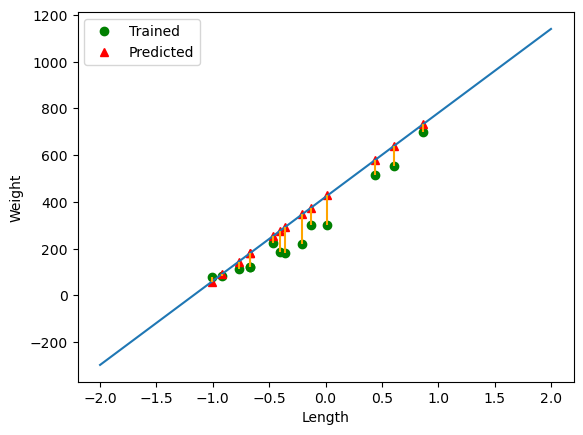

In [134]:
plt.plot(X_test_scaled, y_test, 'go', label='Trained')
plt.plot(X_test_scaled, model.predict(X_test_scaled), 'r^', label='Predicted')
plt.plot([-2,2], [-2*model.coef_+model.intercept_, 2*model.coef_+model.intercept_])
plt.vlines(X_test_scaled, y_test, model.predict(X_test_scaled), colors='orange')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [135]:
print(f' 기울기 : {model.coef_}, 절편: {model.intercept_}')
pre_y=model.predict(X_train_scaled)
mse=mean_squared_error(y_train, pre_y) # 정답부터. 정답, 예측값
rmse=mean_squared_error(y_train, pre_y, squared=False)
mae=mean_absolute_error(y_train, pre_y)
r2=r2_score(y_train, pre_y)
print(f'mse: {mse} \n rmse : {rmse}\n  mae: {mae} \n  r2 :{r2}')

 기울기 : [359.490674], 절편: 421.58095238095257
mse: 11215.004947387759 
 rmse : 105.90092042748145
  mae: 83.2696816362102 
  r2 :0.9201486595884488


In [136]:
print(f' 기울기 : {model.coef_}, 절편: {model.intercept_}')
pre_y=model.predict(X_test_scaled)
mse=mean_squared_error(y_test, pre_y) # 정답부터. 정답, 예측값
rmse=mean_squared_error(y_test, pre_y, squared=False)
mae=mean_absolute_error(y_test, pre_y)
r2=r2_score(y_test, pre_y)
print(f'mse: {mse} \n rmse : {rmse}\n  mae: {mae} \n  r2 :{r2}')

 기울기 : [359.490674], 절편: 421.58095238095257
mse: 5804.609721151876 
 rmse : 76.18798934971231
  mae: 66.00256966358556 
  r2 :0.8332112625890852


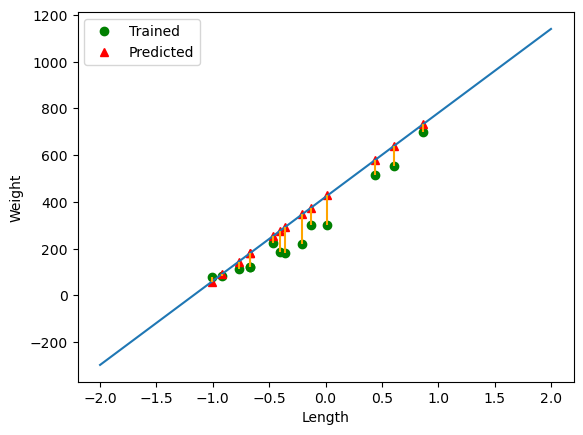

In [138]:
plt.plot(X_test_scaled, y_test, 'go', label='Trained')
plt.plot(X_test_scaled, model.predict(X_test_scaled), 'r^', label='Predicted')
plt.plot([-2,2], [-2*model.coef_+model.intercept_, 2*model.coef_+model.intercept_])
plt.vlines(X_test_scaled, y_test, model.predict(X_test_scaled), colors='orange')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.show()